## Homework Assignment

A 2436 MWth BWR unit is to be operated in an equilibrium reload cycle fashion employing a 24-month refueling cycle with an anticipated 90% capacity factor. Utilizing the following data, develop the complete cycling scheme table for this BWR unit. Assume the core is loaded symmetrically with quarter core symmetry.

- **Number of assemblies**: 560
- **Assembly loading**: 190 kg U
- **Warranted discharge burnup limit**: 40,000 MWD/MTU


In [5]:
from IPython.display import display, Math
import math

# Defining the additional data
thermal_power = 2436  # in MWth
refueling_cycle = 24  # in months
capacity_factor = 0.9  # in percent
num_assemblies = 560  # total assemblies
assembly_loading = 190  # kg U per assembly
discharge_burnup_limit = 40000  # MWD/MTU

# Total energy production
Tot_energy = capacity_factor * thermal_power * refueling_cycle * 30
display(f"Total energy production: {Tot_energy:.0f} MWd")

'Total energy production: 1578528 MWd'

In [6]:
# Cycle burnup
core_mass = num_assemblies * assembly_loading * 1e-3
Bu_cycle = Tot_energy / core_mass
display(f"Cycle burnup: {Bu_cycle:.2f} MWd/tU")

'Cycle burnup: 14835.79 MWd/tU'

In [15]:
# Compute the number of regions which usually is also the number of cycles that a fuel assembly is used for
num_regions = discharge_burnup_limit / Bu_cycle
display(f"Number of regions: {num_regions:.2f}")

'Number of regions: 2.70'

Since it's not an integer all the assemblies will be for sure burned for 2 cycles.  
Some of the assemblies will be burned for 3 cycles.  
Each region will be divided into 2 batches.

In [17]:
# Number of fuel assemblies for region
assemblies_for_region = num_assemblies / num_regions
print(f"Assemblies for region: {assemblies_for_region:.2f}")
# Round it up to be conservative on the Bu limit
round_up_assemblies_for_region = math.ceil(assemblies_for_region)
print(f"Rounded up to: {round_up_assemblies_for_region:.0f}")

Assemblies for region: 207.70
Rounded up to: 208


In [18]:
# Number of full regions: 2.7 --> 2 full regions
num_regions_int = int(num_regions)
print(f"Number of full regions: {num_regions_int}")

Number of full regions: 2


Which means that we will have 2 regions with 208 assemblies and the last region will host the remaining assemblies

In [19]:
region_1 = round_up_assemblies_for_region
region_2 = round_up_assemblies_for_region
region_3 = num_assemblies - 2 * round_up_assemblies_for_region
print(f"Region 1: {region_1:.0f}")
print(f"Region 2: {region_2:.0f}")
print(f"Region 3: {region_3:.0f}")

Region 1: 208
Region 2: 208
Region 3: 144


The smaller region is a single batch that gets burned 3 times.  
The other regions are divided into 2 batches to be burned 2 and 3 times  
The number of assemblies burned 3 times is the number of elements in the third batch  
Which means that the number of assemblies burned 2 times is the larger region - smaller region

In [25]:
Region_1_Batch_1 = region_1 - region_3
Region_1_Batch_2 = region_3
Region_2_Batch_1 = region_2 - region_3
Region_2_Batch_2 = region_3
Region_3_Batch_1 = 0
Region_3_Batch_2 = region_3

print(f"Region 1 Batch 1 (2 cycles): {Region_1_Batch_1:.0f}")
print(f"Region 1 Batch 2 (3 cycles): {Region_1_Batch_2:.0f}")
print(f"Region 2 Batch 1 (2 cycles): {Region_2_Batch_1:.0f}")
print(f"Region 2 Batch 2 (3 cycles): {Region_2_Batch_2:.0f}")
print(f"Region 3 Batch 1 (2 cycles): {Region_3_Batch_1:.0f}")
print(f"Region 3 Batch 2 (3 cycles): {Region_3_Batch_2:.0f}")

Region 1 Batch 1 (2 cycles): 64
Region 1 Batch 2 (3 cycles): 144
Region 2 Batch 1 (2 cycles): 64
Region 2 Batch 2 (3 cycles): 144
Region 3 Batch 1 (2 cycles): 0
Region 3 Batch 2 (3 cycles): 144


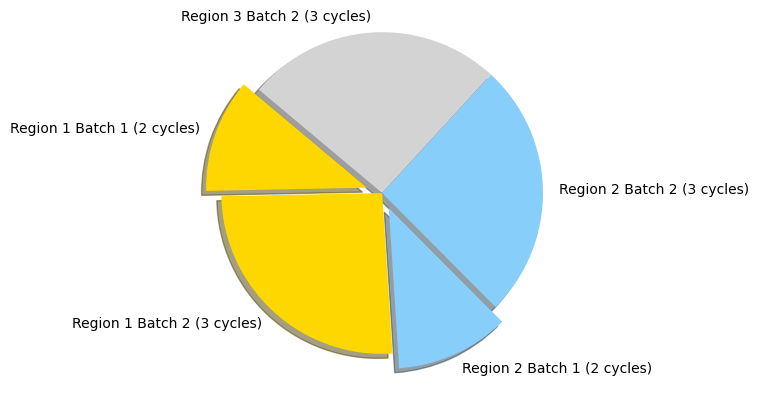

In [35]:
# Pie graph for the distribution of the fuel assemblies
import matplotlib.pyplot as plt

labels = ['Region 1 Batch 1 (2 cycles)', 'Region 1 Batch 2 (3 cycles)', 
          'Region 2 Batch 1 (2 cycles)', 'Region 2 Batch 2 (3 cycles)', 
          'Region 3 Batch 2 (3 cycles)']
sizes = [Region_1_Batch_1, Region_1_Batch_2, 
         Region_2_Batch_1, Region_2_Batch_2, 
         Region_3_Batch_2]
colors = ['gold', 'gold', 'lightskyblue', 'lightskyblue', 'lightgrey']
explode = (0.1, 0, 0.1, 0, 0)  # explode 2 cycles batches

plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=140)
plt.axis('equal')
plt.show()


For a quarter core symmetry we have to check:
-  region size $n_r$ should be MULTIPLE OF 4
-  Batch size MULTIPLE of 4

In [28]:
# Check if batch sizes are multiple of 4
if Region_1_Batch_1 % 4 == 0:
    print("Region 1 Batch 1 is multiple of 4")
else:
    print("Region 1 Batch 1 is not multiple of 4")

if Region_1_Batch_2 % 4 == 0:
    print("Region 1 Batch 2 is multiple of 4")
else:
    print("Region 1 Batch 2 is not multiple of 4")

if Region_2_Batch_1 % 4 == 0:
    print("Region 2 Batch 1 is multiple of 4")
else:
    print("Region 2 Batch 1 is not multiple of 4")

if Region_2_Batch_2 % 4 == 0:
    print("Region 2 Batch 2 is multiple of 4")
else:
    print("Region 2 Batch 2 is not multiple of 4")

if Region_3_Batch_2 % 4 == 0:
    print("Region 3 Batch 2 is multiple of 4")
else:
    print("Region 3 Batch 2 is not multiple of 4")

# Check if the total number of assemblies is multiple of 4
if num_assemblies % 4 == 0:
    print("Total number of assemblies is multiple of 4")
else:
    print("Total number of assemblies is not multiple of 4")

Region 1 Batch 1 is multiple of 4
Region 1 Batch 2 is multiple of 4
Region 2 Batch 1 is multiple of 4
Region 2 Batch 2 is multiple of 4
Region 3 Batch 2 is multiple of 4
Total number of assemblies is multiple of 4


Here is the cycle table:  
| Region  | Batch   | First Loading   | 1   | 2   | 3 (New Fuel Cycle)  | 4    |
|-----|-----|------|-------|-------|-------|-------|
| 1   | 1   | <mark>**64**</mark> | 0     | 0     | 0     | 0     |
| 1   | 2   | <mark>**144**</mark>| 0     | 0     | 0     | 0     |
| 2   | 1   | **64** | **64**| 0     | 0     | 0     |
| 2   | 2   | **144**| <mark>**144**</mark>| 0     | 0     | 0     |
| <mark>3</mark>  | 2   | **144**| **144**| **144**| 0  | 0|
| 4   | 1   | 0      | **64**| **64**| 0     | 0     |
| 4   | 2   | 0      | **144**| **144**| **144**| 0     |
| 5   | 1   | 0      | 0     | **64**| **64**| 0     |
| 5   | 2   | 0      | 0     | **144**| **144**| **144**|
| 6   | 1   | 0      | 0     | 0     | **64**| **64**|
| 6   | 2   | 0      | 0     | 0     | **144**| **144**|
| 7   | 1   | 0      | 0     | 0     | 0     | **64**|
| 7   | 2   | 0      | 0     | 0     | 0     | **144**|

the table need to have this "stairs" pattern.  
For the first cycles some elements will be "sacrificed (those higlighted) as they will not be burned fully.  
After the first fuel cycle (First loading, 1 and 2), the cycles stabilize so that every cycle we just add a new region of 64 + 144 elements.  
The odd region 3 is added only for the first loading.  
In the following cylces the pattern is always there but is just "created" from the 144 batches of the other regions.
